#limpando o data set

In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
df = pd.read_excel("Dados_abertos_Consumo_Mensal.xlsx")
df.sample(10)

,Data,DataExcel,Regiao,Sistema,Classe,TipoConsumidor,Consumo,Consumidores
5308,20181201,2018-12-01,Nordeste,SISTEMAS ISOLADOS,Comercial,Cativo,797.000,257.0
8958,20141001,2014-10-01,Norte,SISTEMAS ISOLADOS,Outros,Cativo,70818.000,16731.0
4022,20200501,2020-05-01,Sudeste,SUDESTE / CENTRO - OESTE,Comercial,Livre,809432.556,5565.0
47,20240901,2024-09-01,Norte,SISTEMAS ISOLADOS,Residencial,Cativo,151425.814,611943.0
11624,20110701,2011-07-01,Sudeste,SUDESTE / CENTRO - OESTE,Industrial,Livre,5924020.000,920.0
12914,20091101,2009-11-01,Sul,SUL,Industrial,Cativo,1669122.000,187061.0
3937,20200601,2020-06-01,Norte,SUDESTE / CENTRO - OESTE,Comercial,Livre,5629.301,51.0
756,20231201,2023-12-01,Sul,SUL,Comercial,Livre,532833.877,4409.0
1735,20221001,2022-10-01,Nordeste,NORTE INTERLIGADO,Outros,Cativo,112121.113,36673.0
9096,20140801,2014-08-01,Norte,SUDESTE / CENTRO - OESTE,Comercial,Livre,1806.000,11.0


<Axes: >

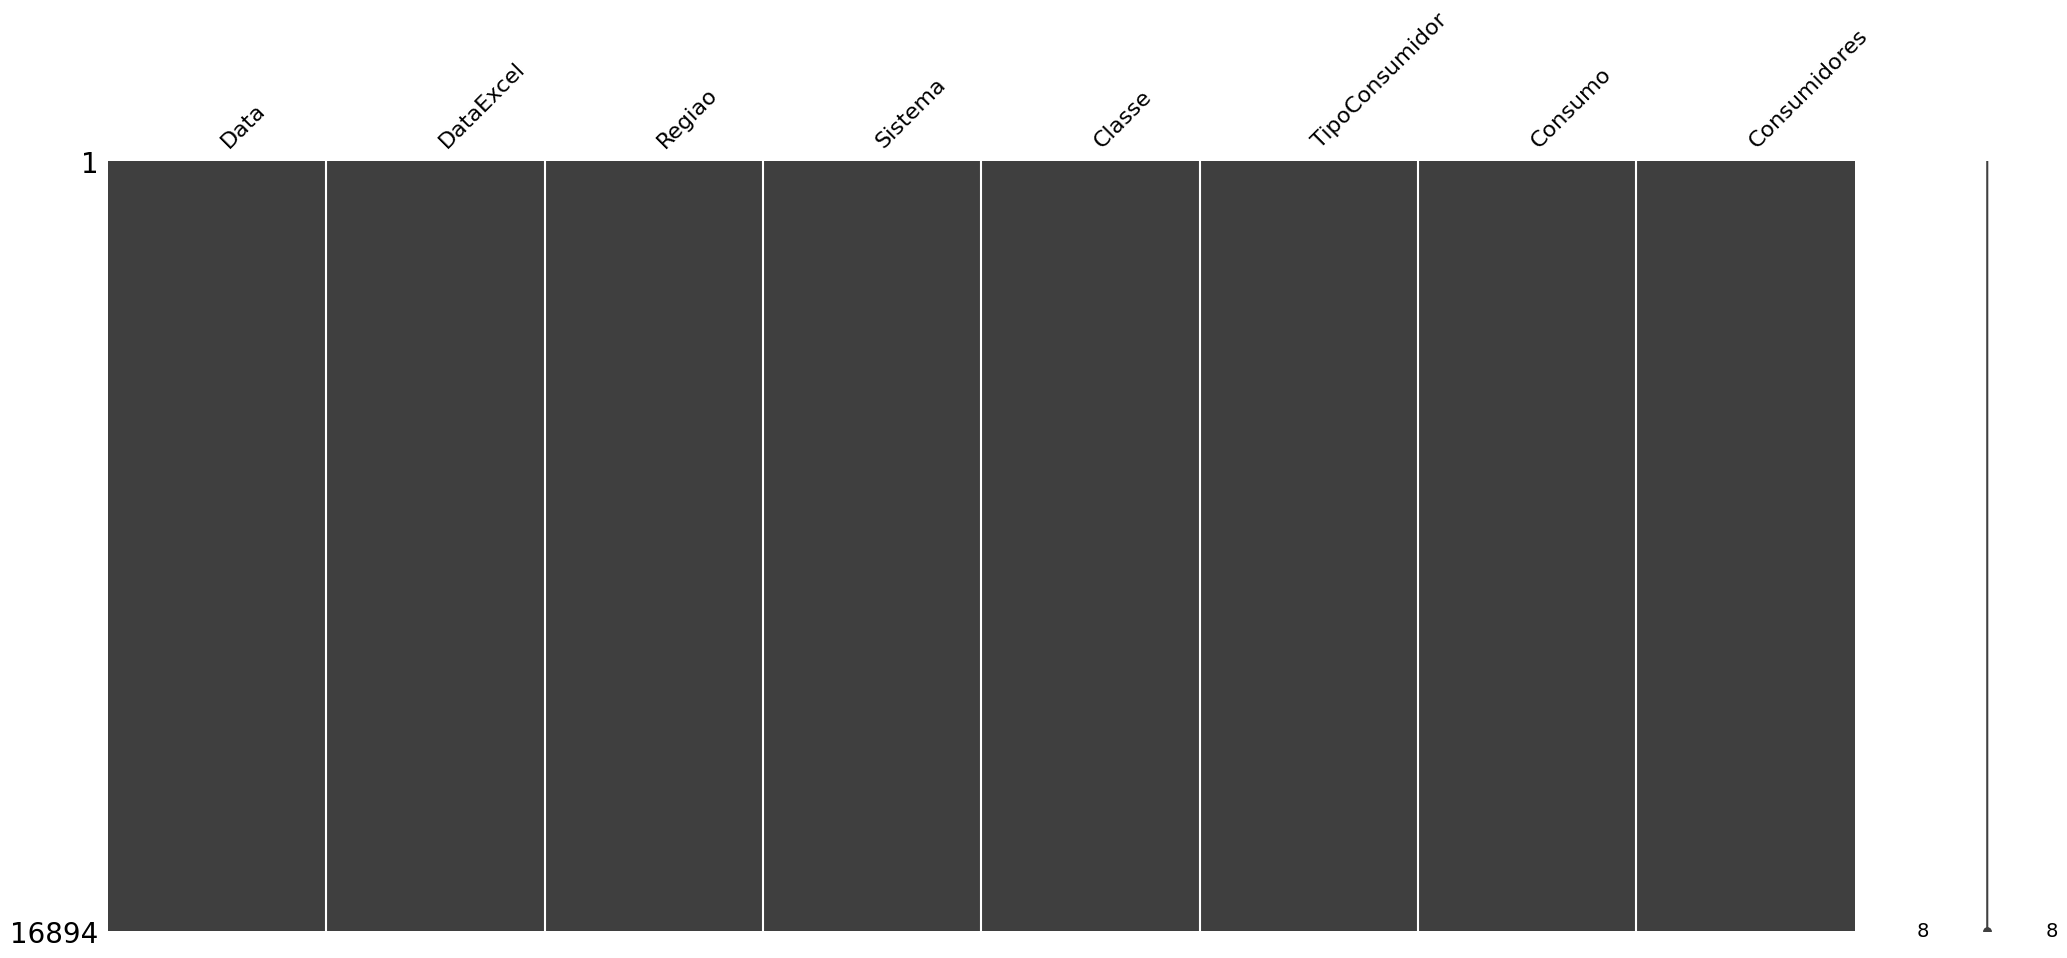

In [3]:
# vendo se possui algum campo sem valor
import missingno as msno
msno.matrix(df)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16894 entries, 0 to 16893
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Data            16894 non-null  int64         
 1   DataExcel       16894 non-null  datetime64[ns]
 2   Regiao          16894 non-null  object        
 3   Sistema         16894 non-null  object        
 4   Classe          16894 non-null  object        
 5   TipoConsumidor  16894 non-null  object        
 6   Consumo         16894 non-null  float64       
 7   Consumidores    16894 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 1.0+ MB


In [5]:
# dropando as colunas que n vai usar
cols_to_drop = [0,2,3,5,7]
df_novo = df.drop(df.columns[cols_to_drop], axis=1)
df_novo.head()

,DataExcel,Classe,Consumo
0,2024-09-01,Comercial,440778.355
1,2024-09-01,Comercial,202637.066
2,2024-09-01,Industrial,88018.441
3,2024-09-01,Industrial,889059.013
4,2024-09-01,Outros,363105.975


In [6]:
# dropando os valores da coluna classe que seja igual a Outros
df_novo = df_novo[df_novo['Classe'] != 'Outros']
print(df_novo['Classe'].unique())

['Comercial' 'Industrial' 'Residencial' 'Rural']


In [7]:
#agrupando os valores do consumo
grouped = df_novo.groupby(['Classe', 'DataExcel'])
df_limpo = grouped['Consumo'].sum()
df_limpo = df_limpo.reset_index()
print(df_limpo)

        Classe  DataExcel      Consumo
0    Comercial 2004-01-01  4244836.914
1    Comercial 2004-02-01  4147274.839
2    Comercial 2004-03-01  4203862.816
3    Comercial 2004-04-01  4447074.694
4    Comercial 2004-05-01  4105720.185
..         ...        ...          ...
991      Rural 2024-05-01  2499548.661
992      Rural 2024-06-01  2668089.614
993      Rural 2024-07-01  2771003.306
994      Rural 2024-08-01  2666179.602
995      Rural 2024-09-01  2706014.041

[996 rows x 3 columns]


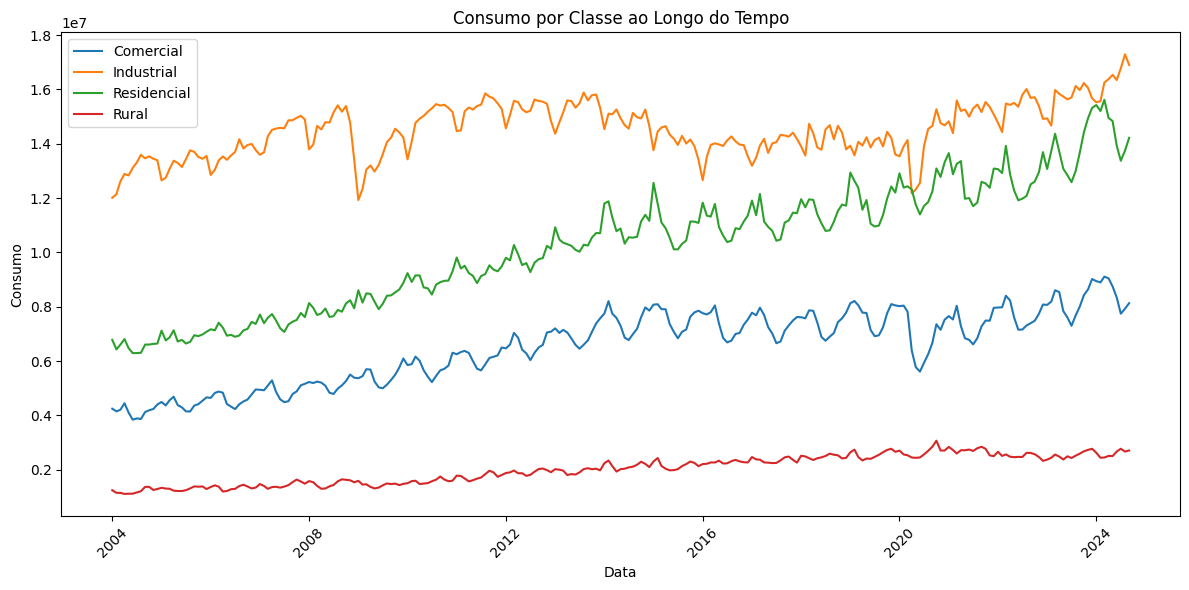

In [8]:
# mostrando a diferença de consumo de energia eletrica de cada setor

plt.figure(figsize=(12, 6))

for classe in df_limpo['Classe'].unique():
    subset = df_limpo[df_limpo['Classe'] == classe]
    plt.plot(subset['DataExcel'], subset['Consumo'], label=classe)

plt.xlabel('Data')
plt.ylabel('Consumo')
plt.title('Consumo por Classe ao Longo do Tempo')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

In [9]:
# ficando somente com o setor de Residencia (na qual eu vou trabalhar)
df_limpo = df_limpo[df_limpo['Classe'] == 'Residencial']
df_limpo

,Classe,DataExcel,Consumo
498,Residencial,2004-01-01,6.780680e+06
499,Residencial,2004-02-01,6.429337e+06
500,Residencial,2004-03-01,6.600338e+06
501,Residencial,2004-04-01,6.809006e+06
502,Residencial,2004-05-01,6.477341e+06
...,...,...,...
742,Residencial,2024-05-01,1.483519e+07
743,Residencial,2024-06-01,1.391993e+07
744,Residencial,2024-07-01,1.337358e+07
745,Residencial,2024-08-01,1.374454e+07


In [10]:
# Medidas de Tendência Central
media = df_limpo['Consumo'].mean()
mediana = df_limpo['Consumo'].median()
moda = df_limpo['Consumo'].mode()[0]

print(f"Média: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")

# Medidas de Dispersão
amplitude = df_limpo['Consumo'].max() - df_limpo['Consumo'].min()
variancia = df_limpo['Consumo'].var()
desvio_padrao = df_limpo['Consumo'].std()

print(f"\nAmplitude: {amplitude}")
print(f"Variância: {variancia}")
print(f"Desvio Padrão: {desvio_padrao}")


# Medidas Separatriz
quartil= df_limpo['Consumo'].quantile([0.25, 0.5, 0.75])
print(f"\nQuartil{quartil}")

percentis = df_limpo['Consumo'].quantile([0.1, 0.9])
print("\nPercentis (10%, 90%):")
print(percentis)


Média: 10253403.489016064
Mediana: 10475249.0
Moda: 6291091.533

Amplitude: 9324415.522
Variância: 5205991181559.575
Desvio Padrão: 2281664.125492526

Quartil0.25    8.188290e+06
0.50    1.047525e+07
0.75    1.191645e+07
Name: Consumo, dtype: float64

Percentis (10%, 90%):
0.1    7.052310e+06
0.9    1.307178e+07
Name: Consumo, dtype: float64


#aplicando a eficiencia de 50% no consumo utilizando lampadas de LED

In [11]:
df_limpo2 = df_limpo.copy()
df_limpo2['Consumo']= df_limpo2['Consumo']*0.5

In [12]:
# Medidas de Tendência Central
media = df_limpo2['Consumo'].mean()
mediana = df_limpo2['Consumo'].median()
moda = df_limpo2['Consumo'].mode()[0]

print(f"Média: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")

# Medidas de Dispersão
amplitude = df_limpo2['Consumo'].max() - df_limpo2['Consumo'].min()
variancia = df_limpo2['Consumo'].var()
desvio_padrao = df_limpo2['Consumo'].std()

print(f"\nAmplitude: {amplitude}")
print(f"Variância: {variancia}")
print(f"Desvio Padrão: {desvio_padrao}")


# Medidas Separatriz
quartil= df_limpo2['Consumo'].quantile([0.25, 0.5, 0.75])
print(f"\nQuartil {quartil}")

percentis = df_limpo2['Consumo'].quantile([0.1, 0.9])
print("\nPercentis (10%, 90%):")
print(percentis)

Média: 5126701.744508032
Mediana: 5237624.5
Moda: 3145545.7665

Amplitude: 4662207.761
Variância: 1301497795389.8938
Desvio Padrão: 1140832.062746263

Quartil 0.25    4094145.000
0.50    5237624.500
0.75    5958224.106
Name: Consumo, dtype: float64

Percentis (10%, 90%):
0.1    3.526155e+06
0.9    6.535888e+06
Name: Consumo, dtype: float64


#aplicando eficiencia de 40% do dimming em cima das lampadas de LED

In [13]:
df_limpo3 = df_limpo2.copy()
df_limpo3['Consumo']= df_limpo3['Consumo']*0.6

In [14]:
# Medidas de Tendência Central
media = df_limpo3['Consumo'].mean()
mediana = df_limpo3['Consumo'].median()
moda = df_limpo3['Consumo'].mode()[0]

print(f"Média: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")

# Medidas de Dispersão
amplitude = df_limpo3['Consumo'].max() - df_limpo3['Consumo'].min()
variancia = df_limpo3['Consumo'].var()
desvio_padrao = df_limpo3['Consumo'].std()

print(f"\nAmplitude: {amplitude}")
print(f"Variância: {variancia}")
print(f"Desvio Padrão: {desvio_padrao}")


# Medidas Separatriz
quartil= df_limpo3['Consumo'].quantile([0.25, 0.5, 0.75])
print(f"\nQuartil {quartil}")

percentis = df_limpo3['Consumo'].quantile([0.1, 0.9])
print("\nPercentis (10%, 90%):")
print(percentis)

Média: 3076021.046704819
Mediana: 3142574.6999999997
Moda: 1887327.4599

Amplitude: 2797324.6565999994
Variância: 468539206340.36163
Desvio Padrão: 684499.2376477579

Quartil 0.25    2.456487e+06
0.50    3.142575e+06
0.75    3.574934e+06
Name: Consumo, dtype: float64

Percentis (10%, 90%):
0.1    2.115693e+06
0.9    3.921533e+06
Name: Consumo, dtype: float64


# aplicando o sistema de automação que aumenta a eficiencia em 30% em cima do valor anterior

In [15]:
df_limpo4 = df_limpo3.copy()
df_limpo4['Consumo']= df_limpo4['Consumo']*0.7

In [16]:
# Medidas de Tendência Central
media = df_limpo4['Consumo'].mean()
mediana = df_limpo4['Consumo'].median()
moda = df_limpo4['Consumo'].mode()[0]

print(f"Média: {media}")
print(f"Mediana: {mediana}")
print(f"Moda: {moda}")

# Medidas de Dispersão
amplitude = df_limpo4['Consumo'].max() - df_limpo4['Consumo'].min()
variancia = df_limpo4['Consumo'].var()
desvio_padrao = df_limpo4['Consumo'].std()

print(f"\nAmplitude: {amplitude}")
print(f"Variância: {variancia}")
print(f"Desvio Padrão: {desvio_padrao}")


# Medidas Separatriz
quartil= df_limpo4['Consumo'].quantile([0.25, 0.5, 0.75])
print(f"\nQuartil {quartil}")

percentis = df_limpo4['Consumo'].quantile([0.1, 0.9])
print("\nPercentis (10%, 90%):")
print(percentis)

Média: 2153214.732693373
Mediana: 2199802.2899999996
Moda: 1321129.2219299998

Amplitude: 1958127.25962
Variância: 229584211106.77716
Desvio Padrão: 479149.4663534304

Quartil 0.25    1.719541e+06
0.50    2.199802e+06
0.75    2.502454e+06
Name: Consumo, dtype: float64

Percentis (10%, 90%):
0.1    1.480985e+06
0.9    2.745073e+06
Name: Consumo, dtype: float64


# comparando os resultados com as tecnologias aplicadas uma a uma

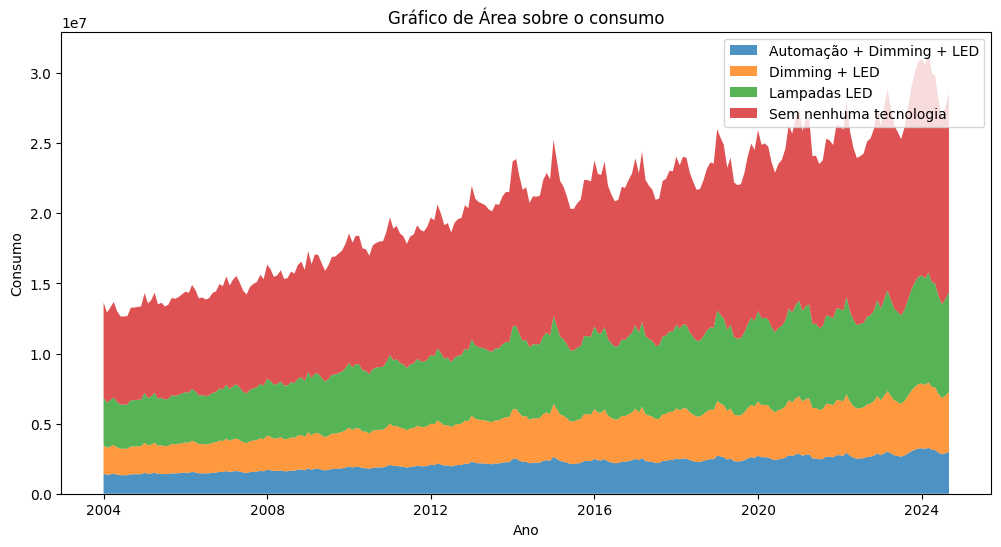

In [19]:
# Definindo a área de plotagem
plt.figure(figsize=(12, 6))
# Dados de exemplo
anos = df_limpo3['DataExcel']
c1 = df_limpo4['Consumo']
c2 = df_limpo3['Consumo']
c3 = df_limpo2['Consumo']
c4 = df_limpo['Consumo']
rotulos = ['Automação + Dimming + LED', 'Dimming + LED', 'Lampadas LED', 'Sem nenhuma tecnologia' ]
# Criar o gráfico de área
plt.stackplot(anos, c1, c2, c3, c4, labels=rotulos, alpha=0.8)
# Adicionar título e rótulos aos eixos
plt.title('Gráfico de Área sobre o consumo')
plt.xlabel('Ano')
plt.ylabel('Consumo')
plt.legend()
# Mostrar o gráfico
plt.show()

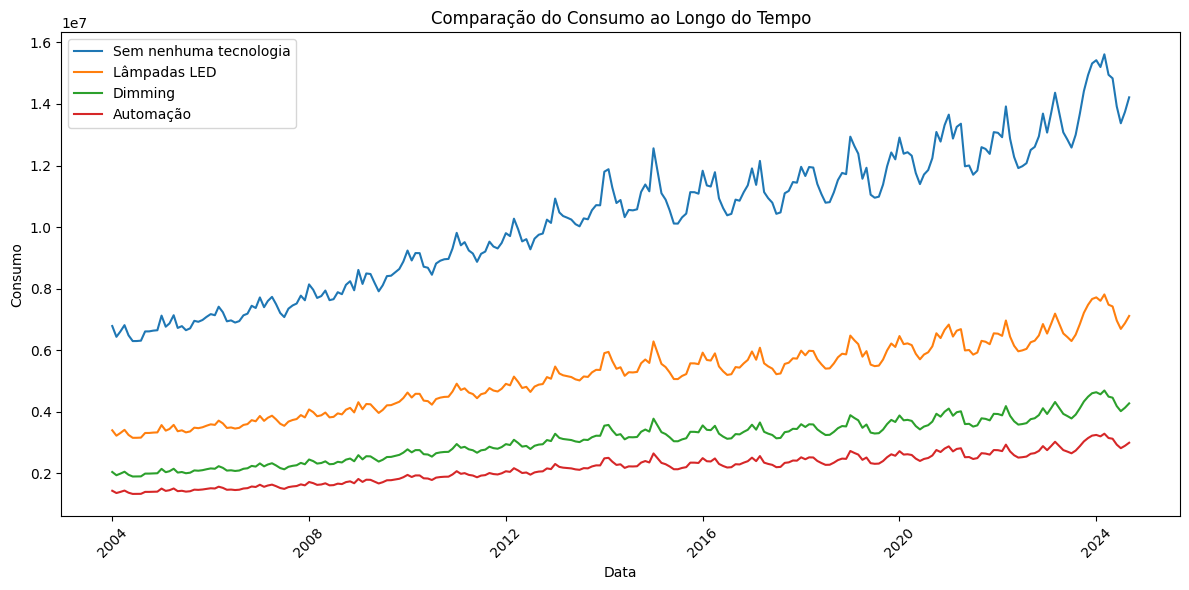

In [20]:
plt.figure(figsize=(12, 6))

plt.plot(df_limpo['DataExcel'], df_limpo['Consumo'], label='Sem nenhuma tecnologia')
plt.plot(df_limpo2['DataExcel'], df_limpo2['Consumo'], label='Lâmpadas LED')
plt.plot(df_limpo3['DataExcel'], df_limpo3['Consumo'], label='Dimming')
plt.plot(df_limpo4['DataExcel'], df_limpo4['Consumo'], label='Automação')

plt.xlabel('Data')
plt.ylabel('Consumo')
plt.title('Comparação do Consumo ao Longo do Tempo')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# arrumando o dataframe e exportar para a proxima atividade

In [ ]:
cols_to_drop = [0,3,5]
df_exportar = df.drop(df.columns[cols_to_drop], axis=1)
df_exportar.head()

In [ ]:
grouped = df_exportar.groupby(['DataExcel', 'Regiao', 'Classe', ])
df_exportar = grouped[['Consumo', 'Consumidores']].sum()
df_exportar = df_exportar.reset_index()
print(df_exportar)
df_exportar.to_csv('bancodedados.csv')

In [ ]:
df_exportar = df_exportar[df_exportar['Classe'] == "Residencial"]
df_exportar = df_exportar.reset_index()
df_exportar.to_csv('bancodedadosResdiencial.csv')

In [ ]:
df_exportar.head()